In [1]:
import deepchem as dc
from deepchem.feat.graph_data import GraphData
from deepchem.feat import MolGraphConvFeaturizer
import numpy as np
import pandas as pd

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (C:\Users\yyyyx\miniconda3\envs\deepchem\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
df = pd.read_csv('./TDC_dataset/CYP1A2.csv')

In [3]:
df

,Unnamed: 0,Drug_ID,Drug,Y
0,0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0
1,1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,1
2,2,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
3,3,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
4,4,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
...,...,...,...,...
12574,12574,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
12575,12575,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
12576,12576,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,0
12577,12577,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [5]:
# 1. Y값이 1인 데이터 선택
df_positive = df[df['Y'] == 1]

In [6]:
df_positive

,Unnamed: 0,Drug_ID,Drug,Y
1,1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,1
2,2,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
3,3,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
4,4,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
5,5,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
...,...,...,...,...
11950,11950,1184355.0,Cc1cc(OCc2ccc([N+](=O)[O-])cc2)c2c3c(c(=O)oc2c...,1
11952,11952,2962400.0,COc1cc(CNC2CCCC2)cc(Cl)c1OCc1ccccc1Cl.Cl,1
11956,11956,1242706.0,O=C(CSc1nnc(SCc2cccc3ccccc23)s1)c1ccc2c(c1)OCO2,1
11961,11961,875154.0,Cc1ccnc(NC(=S)NC(=O)c2ccco2)c1,1


In [7]:
# 1. SMILES에서 그래프 형식으로 변환
featurizer = MolGraphConvFeaturizer()
features = featurizer.featurize(df["Drug"])  # Smiles 컬럼에서 특징 추출

In [8]:
features

array([GraphData(node_features=[22, 30], edge_index=[2, 44], edge_features=None),
       GraphData(node_features=[34, 30], edge_index=[2, 76], edge_features=None),
       GraphData(node_features=[24, 30], edge_index=[2, 52], edge_features=None),
       ...,
       GraphData(node_features=[24, 30], edge_index=[2, 56], edge_features=None),
       GraphData(node_features=[26, 30], edge_index=[2, 58], edge_features=None),
       GraphData(node_features=[17, 30], edge_index=[2, 34], edge_features=None)],
      dtype=object)

In [9]:
# 2. 레이블 설정 (pIC50)
labels = df["Y"].values

In [10]:
# 3. 가중치 (필요시 기본값으로 1 설정)
weights = None  # 기본적으로 None으로 설정. 커스텀 가중치가 있으면 지정.

# 4. 데이터셋 생성
dataset = dc.data.NumpyDataset(X=features, y=labels, w=weights)

In [11]:
dataset

<NumpyDataset X.shape: (12579,), y.shape: (12579,), w.shape: (12579,), task_names: [0]>

In [12]:
# 데이터셋 확인
print(f"Number of samples in dataset: {len(dataset)}")
print(f"Feature shape: {dataset.X[0].node_features.shape[0]} nodes, {dataset.X[0].edge_index.shape[1]} edges")
print(f"First label: {dataset.y[0]}")

Number of samples in dataset: 12579
Feature shape: 22 nodes, 44 edges
First label: 0


In [13]:
# 데이터셋을 Train/Validation/Test로 나누기
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)

# 확인
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 10063
Validation dataset size: 1258
Test dataset size: 1258


In [14]:
metric_list = [
    dc.metrics.Metric(dc.metrics.roc_auc_score, name='roc_auc_score'),
    dc.metrics.Metric(dc.metrics.accuracy_score, name='accuracy_score'),
    #dc.metrics.Metric(dc.metrics.precision_score, name='precision_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.recall_score, name='recall_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.f1_score, name='f1_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.matthews_corrcoef, name='mcc_score')
]

In [16]:
import pandas as pd
import deepchem as dc
from itertools import product
from tqdm import tqdm

# 하이퍼파라미터 설정
param_grid = {
    'graph_conv_layers': [[64, 64], [128, 128], [64, 128, 64]],
    'dense_layer_size': [128, 256],
    'dropout': [0.2, 0.3],
    'learning_rate': [1e-3, 5e-4, 1e-4]
}

# 하이퍼파라미터 조합 생성
combinations = list(product(
    param_grid['graph_conv_layers'],
    param_grid['dense_layer_size'],
    param_grid['dropout'],
    param_grid['learning_rate']
))

# 결과 저장 리스트 초기화
results = []

# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, test: DeepChem의 NumpyDataset 형식
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# 그리드 서치 진행
for idx, (graph_conv_layers, dense_layer_size, dropout, learning_rate) in enumerate(
    tqdm(combinations, desc="Grid Search Progress")):
    
    print(f"\nRunning combination {idx + 1}/{len(combinations)}:")
    print(f"graph_conv_layers: {graph_conv_layers}, dense_layer_size: {dense_layer_size}, "
          f"dropout: {dropout}, learning_rate: {learning_rate}")
    
    try:
        # 모델 생성
        model = dc.models.GCNModel(
            n_tasks=1,
            graph_conv_layers=graph_conv_layers,
            dense_layer_size=dense_layer_size,
            dropout=dropout,
            mode='classification',
            learning_rate=learning_rate,
            batch_size=128
        )
        
        # 모델 학습
        model.fit(train_dataset, nb_epoch=10)
        
        # 모델 평가 (train, test 각각)
        train_scores = model.evaluate(train_dataset, metric_list)
        test_scores = model.evaluate(test_dataset, metric_list)
        
        # 결과 저장용 딕셔너리 생성
        result_dict = {
            'graph_conv_layers': graph_conv_layers,
            'dense_layer_size': dense_layer_size,
            'dropout': dropout,
            'learning_rate': learning_rate,
            'batch_size': 128
        }
        
        # train 스코어 (roc_auc, accuracy, precision 등)
        for metric_name, metric_value in train_scores.items():
            result_dict[f'train_{metric_name}'] = metric_value
        
        # test 스코어 (roc_auc, accuracy, precision 등)
        for metric_name, metric_value in test_scores.items():
            result_dict[f'test_{metric_name}'] = metric_value
        
        results.append(result_dict)
        
        # 로그 표시
        print("Train Scores:", train_scores)
        print("Test Scores:", test_scores)
        
    except Exception as e:
        print(f"Error during training for combination {idx + 1}: {e}")

# 모든 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

Grid Search Progress:   0%|                                                                     | 0/36 [00:00<?, ?it/s]


Running combination 1/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:   3%|█▋                                                           | 1/36 [01:03<37:03, 63.53s/it]

Train Scores: {'roc_auc_score': 0.9118767715633012, 'accuracy_score': 0.7934015701083176}
Test Scores: {'roc_auc_score': 0.9042172471990078, 'accuracy_score': 0.78060413354531}

Running combination 2/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:   6%|███▍                                                         | 2/36 [02:07<35:58, 63.50s/it]

Train Scores: {'roc_auc_score': 0.891730393521766, 'accuracy_score': 0.6328132763589387}
Test Scores: {'roc_auc_score': 0.8852940279387544, 'accuracy_score': 0.6224165341812401}

Running combination 3/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:   8%|█████                                                        | 3/36 [03:06<34:00, 61.84s/it]

Train Scores: {'roc_auc_score': 0.8554082694933397, 'accuracy_score': 0.7046606379807214}
Test Scores: {'roc_auc_score': 0.8570426401512841, 'accuracy_score': 0.7027027027027027}

Running combination 4/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  11%|██████▊                                                      | 4/36 [04:06<32:32, 61.03s/it]

Train Scores: {'roc_auc_score': 0.8946771700655514, 'accuracy_score': 0.8123819934413197}
Test Scores: {'roc_auc_score': 0.8953338823481567, 'accuracy_score': 0.8060413354531002}

Running combination 5/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  14%|████████▍                                                    | 5/36 [05:06<31:21, 60.70s/it]

Train Scores: {'roc_auc_score': 0.8636117275515574, 'accuracy_score': 0.7015800457120143}
Test Scores: {'roc_auc_score': 0.85976229691535, 'accuracy_score': 0.6868044515103339}

Running combination 6/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  17%|██████████▏                                                  | 6/36 [06:06<30:14, 60.48s/it]

Train Scores: {'roc_auc_score': 0.8599225924940539, 'accuracy_score': 0.7725330418364305}
Test Scores: {'roc_auc_score': 0.86663006567844, 'accuracy_score': 0.7766295707472178}

Running combination 7/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  19%|███████████▊                                                 | 7/36 [07:06<29:05, 60.19s/it]

Train Scores: {'roc_auc_score': 0.9199012422310442, 'accuracy_score': 0.7479876776309252}
Test Scores: {'roc_auc_score': 0.9127778116675818, 'accuracy_score': 0.7400635930047694}

Running combination 8/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  22%|█████████████▌                                               | 8/36 [08:06<28:01, 60.05s/it]

Train Scores: {'roc_auc_score': 0.8955927399419508, 'accuracy_score': 0.6845871012620491}
Test Scores: {'roc_auc_score': 0.898157750259257, 'accuracy_score': 0.6836248012718601}

Running combination 9/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  25%|███████████████▎                                             | 9/36 [09:05<26:58, 59.96s/it]

Train Scores: {'roc_auc_score': 0.8768289464501486, 'accuracy_score': 0.7095299612441618}
Test Scores: {'roc_auc_score': 0.8744433599707193, 'accuracy_score': 0.7138314785373608}

Running combination 10/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  28%|████████████████▋                                           | 10/36 [10:06<26:07, 60.28s/it]

Train Scores: {'roc_auc_score': 0.8989429154577697, 'accuracy_score': 0.7255291662526085}
Test Scores: {'roc_auc_score': 0.8977968238475773, 'accuracy_score': 0.7138314785373608}

Running combination 11/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  31%|██████████████████▎                                         | 11/36 [11:11<25:36, 61.46s/it]

Train Scores: {'roc_auc_score': 0.8829506824089031, 'accuracy_score': 0.6913445294643744}
Test Scores: {'roc_auc_score': 0.8822261534394762, 'accuracy_score': 0.6860095389507154}

Running combination 12/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  33%|████████████████████                                        | 12/36 [12:15<24:55, 62.33s/it]

Train Scores: {'roc_auc_score': 0.8631937098700049, 'accuracy_score': 0.6973069661134851}
Test Scores: {'roc_auc_score': 0.8637019866203053, 'accuracy_score': 0.7042925278219396}

Running combination 13/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  36%|█████████████████████▋                                      | 13/36 [13:19<24:05, 62.84s/it]

Train Scores: {'roc_auc_score': 0.9265462148518784, 'accuracy_score': 0.8512372056046904}
Test Scores: {'roc_auc_score': 0.9206165233127961, 'accuracy_score': 0.8410174880763116}

Running combination 14/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  39%|███████████████████████▎                                    | 14/36 [14:22<23:01, 62.78s/it]

Train Scores: {'roc_auc_score': 0.9050431550656637, 'accuracy_score': 0.764583126304283}
Test Scores: {'roc_auc_score': 0.9014086296996686, 'accuracy_score': 0.7623211446740858}

Running combination 15/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  42%|█████████████████████████                                   | 15/36 [15:22<21:44, 62.14s/it]

Train Scores: {'roc_auc_score': 0.8879990100960202, 'accuracy_score': 0.7257279141409122}
Test Scores: {'roc_auc_score': 0.8850220622623477, 'accuracy_score': 0.7170111287758346}

Running combination 16/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  44%|██████████████████████████▋                                 | 16/36 [16:25<20:46, 62.34s/it]

Train Scores: {'roc_auc_score': 0.9140179410965845, 'accuracy_score': 0.8189406737553413}
Test Scores: {'roc_auc_score': 0.9087339108155921, 'accuracy_score': 0.8171701112877583}

Running combination 17/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  47%|████████████████████████████▎                               | 17/36 [17:28<19:46, 62.44s/it]

Train Scores: {'roc_auc_score': 0.8960841985267198, 'accuracy_score': 0.7274172711914936}
Test Scores: {'roc_auc_score': 0.893036153642815, 'accuracy_score': 0.7090620031796503}

Running combination 18/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  50%|██████████████████████████████                              | 18/36 [18:30<18:42, 62.35s/it]

Train Scores: {'roc_auc_score': 0.8681201653555679, 'accuracy_score': 0.7064493689754546}
Test Scores: {'roc_auc_score': 0.8686100774720917, 'accuracy_score': 0.7146263910969793}

Running combination 19/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  53%|███████████████████████████████▋                            | 19/36 [19:31<17:35, 62.06s/it]

Train Scores: {'roc_auc_score': 0.9163486080090599, 'accuracy_score': 0.7793898439829077}
Test Scores: {'roc_auc_score': 0.9127346021675918, 'accuracy_score': 0.7790143084260731}

Running combination 20/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  56%|█████████████████████████████████▎                          | 20/36 [20:36<16:45, 62.81s/it]

Train Scores: {'roc_auc_score': 0.9124682189453552, 'accuracy_score': 0.8207294047500745}
Test Scores: {'roc_auc_score': 0.9063294292279225, 'accuracy_score': 0.8187599364069952}

Running combination 21/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  58%|███████████████████████████████████                         | 21/36 [21:39<15:46, 63.09s/it]

Train Scores: {'roc_auc_score': 0.8815940006642233, 'accuracy_score': 0.698598827387459}
Test Scores: {'roc_auc_score': 0.8763928709408488, 'accuracy_score': 0.6844197138314785}

Running combination 22/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  61%|████████████████████████████████████▋                       | 22/36 [22:42<14:38, 62.78s/it]

Train Scores: {'roc_auc_score': 0.9007117892339764, 'accuracy_score': 0.7844579151346517}
Test Scores: {'roc_auc_score': 0.8887304540555929, 'accuracy_score': 0.7758346581875993}

Running combination 23/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  64%|██████████████████████████████████████▎                     | 23/36 [23:46<13:40, 63.15s/it]

Train Scores: {'roc_auc_score': 0.9059851438183284, 'accuracy_score': 0.7331809599523005}
Test Scores: {'roc_auc_score': 0.9027049146993634, 'accuracy_score': 0.7305246422893482}

Running combination 24/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  67%|████████████████████████████████████████                    | 24/36 [24:48<12:36, 63.07s/it]

Train Scores: {'roc_auc_score': 0.8613587194320105, 'accuracy_score': 0.6617310941071252}
Test Scores: {'roc_auc_score': 0.8608120335915737, 'accuracy_score': 0.6518282988871225}

Running combination 25/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  69%|█████████████████████████████████████████▋                  | 25/36 [25:52<11:35, 63.23s/it]

Train Scores: {'roc_auc_score': 0.9000192613655356, 'accuracy_score': 0.8164563251515453}
Test Scores: {'roc_auc_score': 0.8955600967892801, 'accuracy_score': 0.8163751987281399}

Running combination 26/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  72%|███████████████████████████████████████████▎                | 26/36 [26:56<10:34, 63.41s/it]

Train Scores: {'roc_auc_score': 0.9096832505753598, 'accuracy_score': 0.7912153433369771}
Test Scores: {'roc_auc_score': 0.9052746090811119, 'accuracy_score': 0.7901430842607313}

Running combination 27/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  75%|█████████████████████████████████████████████               | 27/36 [28:01<09:34, 63.86s/it]

Train Scores: {'roc_auc_score': 0.8694902054050759, 'accuracy_score': 0.7263241578058233}
Test Scores: {'roc_auc_score': 0.8765377498525794, 'accuracy_score': 0.7360890302066773}

Running combination 28/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  78%|██████████████████████████████████████████████▋             | 28/36 [29:04<08:28, 63.58s/it]

Train Scores: {'roc_auc_score': 0.8974700581437587, 'accuracy_score': 0.8075126701778793}
Test Scores: {'roc_auc_score': 0.8961161013847374, 'accuracy_score': 0.8108108108108109}

Running combination 29/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  81%|████████████████████████████████████████████████▎           | 29/36 [30:08<07:25, 63.65s/it]

Train Scores: {'roc_auc_score': 0.86255671920351, 'accuracy_score': 0.6704760011924873}
Test Scores: {'roc_auc_score': 0.8608018666503996, 'accuracy_score': 0.6534181240063593}

Running combination 30/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  83%|██████████████████████████████████████████████████          | 30/36 [31:10<06:20, 63.43s/it]

Train Scores: {'roc_auc_score': 0.8541471403184127, 'accuracy_score': 0.7335784557289079}
Test Scores: {'roc_auc_score': 0.8612237947091239, 'accuracy_score': 0.7527821939586645}

Running combination 31/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  86%|███████████████████████████████████████████████████▋        | 31/36 [32:12<05:14, 62.93s/it]

Train Scores: {'roc_auc_score': 0.906578437147409, 'accuracy_score': 0.8048295736857796}
Test Scores: {'roc_auc_score': 0.9043367087578031, 'accuracy_score': 0.7933227344992051}

Running combination 32/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  89%|█████████████████████████████████████████████████████▎      | 32/36 [33:13<04:09, 62.36s/it]

Train Scores: {'roc_auc_score': 0.9032120847839897, 'accuracy_score': 0.8238099970187817}
Test Scores: {'roc_auc_score': 0.9032488460521768, 'accuracy_score': 0.8235294117647058}

Running combination 33/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  92%|███████████████████████████████████████████████████████     | 33/36 [34:14<03:05, 61.95s/it]

Train Scores: {'roc_auc_score': 0.872250918428117, 'accuracy_score': 0.7876378813475107}
Test Scores: {'roc_auc_score': 0.8810391630574025, 'accuracy_score': 0.8044515103338633}

Running combination 34/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  94%|████████████████████████████████████████████████████████▋   | 34/36 [35:15<02:03, 61.61s/it]

Train Scores: {'roc_auc_score': 0.887526269017125, 'accuracy_score': 0.8095001490609163}
Test Scores: {'roc_auc_score': 0.8902173692023019, 'accuracy_score': 0.8139904610492846}

Running combination 35/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  97%|██████████████████████████████████████████████████████████▎ | 35/36 [36:16<01:01, 61.54s/it]

Train Scores: {'roc_auc_score': 0.8985205012464708, 'accuracy_score': 0.810295140614131}
Test Scores: {'roc_auc_score': 0.8984297159356637, 'accuracy_score': 0.8131955484896661}

Running combination 36/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress: 100%|████████████████████████████████████████████████████████████| 36/36 [37:18<00:00, 62.17s/it]

Train Scores: {'roc_auc_score': 0.8515333487995905, 'accuracy_score': 0.7072443605286693}
Test Scores: {'roc_auc_score': 0.8562547022102929, 'accuracy_score': 0.7209856915739269}


In [17]:
results_df

,graph_conv_layers,dense_layer_size,dropout,learning_rate,batch_size,train_roc_auc_score,train_accuracy_score,test_roc_auc_score,test_accuracy_score
0,"[64, 64]",128,0.2,0.0010,128,0.911877,0.793402,0.904217,0.780604
1,"[64, 64]",128,0.2,0.0005,128,0.891730,0.632813,0.885294,0.622417
2,"[64, 64]",128,0.2,0.0001,128,0.855408,0.704661,0.857043,0.702703
3,"[64, 64]",128,0.3,0.0010,128,0.894677,0.812382,0.895334,0.806041
4,"[64, 64]",128,0.3,0.0005,128,0.863612,0.701580,0.859762,0.686804
5,"[64, 64]",128,0.3,0.0001,128,0.859923,0.772533,0.866630,0.776630
6,"[64, 64]",256,0.2,0.0010,128,0.919901,0.747988,0.912778,0.740064
7,"[64, 64]",256,0.2,0.0005,128,0.895593,0.684587,0.898158,0.683625
8,"[64, 64]",256,0.2,0.0001,128,0.876829,0.709530,0.874443,0.713831
9,"[64, 64]",256,0.3,0.0010,128,0.898943,0.725529,0.897797,0.713831


In [18]:
# 유효성 점수 기준으로 정렬
results_df = results_df.sort_values(by='test_accuracy_score', ascending=False)

# 결과 저장
results_df.to_csv("./Gridsearch_result/gridsearch_results_CYP1A2.csv", index=False)

# 상위 결과 출력
print("\nTop Results:")
print(results_df.head())


Top Results:
   graph_conv_layers  dense_layer_size  dropout  learning_rate  batch_size  \
12        [128, 128]               128      0.2         0.0010         128   
31     [64, 128, 64]               256      0.2         0.0005         128   
19        [128, 128]               256      0.2         0.0005         128   
15        [128, 128]               128      0.3         0.0010         128   
24     [64, 128, 64]               128      0.2         0.0010         128   

    train_roc_auc_score  train_accuracy_score  test_roc_auc_score  \
12             0.926546              0.851237            0.920617   
31             0.903212              0.823810            0.903249   
19             0.912468              0.820729            0.906329   
15             0.914018              0.818941            0.908734   
24             0.900019              0.816456            0.895560   

    test_accuracy_score  
12             0.841017  
31             0.823529  
19             0.818760 

In [19]:
# test_accuracy_score 순
results_df.head(10)

,graph_conv_layers,dense_layer_size,dropout,learning_rate,batch_size,train_roc_auc_score,train_accuracy_score,test_roc_auc_score,test_accuracy_score
12,"[128, 128]",128,0.2,0.0010,128,0.926546,0.851237,0.920617,0.841017
31,"[64, 128, 64]",256,0.2,0.0005,128,0.903212,0.823810,0.903249,0.823529
19,"[128, 128]",256,0.2,0.0005,128,0.912468,0.820729,0.906329,0.818760
15,"[128, 128]",128,0.3,0.0010,128,0.914018,0.818941,0.908734,0.817170
24,"[64, 128, 64]",128,0.2,0.0010,128,0.900019,0.816456,0.895560,0.816375
33,"[64, 128, 64]",256,0.3,0.0010,128,0.887526,0.809500,0.890217,0.813990
34,"[64, 128, 64]",256,0.3,0.0005,128,0.898521,0.810295,0.898430,0.813196
27,"[64, 128, 64]",128,0.3,0.0010,128,0.897470,0.807513,0.896116,0.810811
3,"[64, 64]",128,0.3,0.0010,128,0.894677,0.812382,0.895334,0.806041
32,"[64, 128, 64]",256,0.2,0.0001,128,0.872251,0.787638,0.881039,0.804452


In [20]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [21]:
# test_accuracy_score 1등
model_1st = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128,128],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    learning_rate=0.001,
    batch_size=128,
)
# test_accuracy_score 2등
model_2nd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64, 128,64],
    dense_layer_size=256,
    dropout=0.2,
    mode='classification',
    learning_rate=0.0005,
    batch_size=128,
)

In [22]:
# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, valid_dataset: DeepChem의 NumpyDataset 형식
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [23]:
%%time
model_1st.fit(train_dataset, nb_epoch=100)

CPU times: total: 37min 50s
Wall time: 9min 10s


0.21658018112182617

In [24]:
print('Training set score:', model_1st.evaluate(train_dataset, [metric]))
print('Test set score:', model_1st.evaluate(test_dataset, [metric]))
print('Validation set score:', model_1st.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9652978036564995}
Test set score: {'roc_auc_score': 0.9076384229040851}
Validation set score: {'roc_auc_score': 0.895655472256222}


In [25]:
%%time
model_2nd.fit(train_dataset, nb_epoch=100)

CPU times: total: 38min 28s
Wall time: 9min 18s


0.2611300277709961

In [26]:
print('Training set score:', model_2nd.evaluate(train_dataset, [metric]))
print('Test set score:', model_2nd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_2nd.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9478601940856493}
Test set score: {'roc_auc_score': 0.9039096972284919}
Validation set score: {'roc_auc_score': 0.892703233374133}


In [27]:
import numpy as np

# 테스트셋 예측 (로짓 혹은 확률)
y_pred_prob = model_1st.predict(test_dataset)  
# y_pred_prob.shape: (num_samples, 2)

# 가장 큰 값을 가진 인덱스를 클래스로 결정
y_pred = np.argmax(y_pred_prob, axis=1)

In [31]:
import numpy as np

# 테스트셋 예측 (로짓 혹은 확률)
y_pred_prob_2nd = model_2nd.predict(test_dataset)  
# y_pred_prob.shape: (num_samples, 2)

# 가장 큰 값을 가진 인덱스를 클래스로 결정
y_pred_2nd = np.argmax(y_pred_prob_2nd, axis=1)

In [28]:
y_true = test_dataset.y
if len(y_true.shape) == 2 and y_true.shape[1] == 1:
    y_true = y_true.reshape(-1)


In [33]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix on {model_1st}:\n", cm_test)


Confusion Matrix on <deepchem.models.torch_models.gcn.GCNModel object at 0x0000023CCFDBE610>:
 [[647  29]
 [258 324]]


In [32]:
from sklearn.metrics import confusion_matrix

cm_test_2nd = confusion_matrix(y_true, y_pred_2nd)
print(f"Confusion Matrix on {model_2nd}:\n", cm_test_2nd)


Confusion Matrix on <deepchem.models.torch_models.gcn.GCNModel object at 0x0000023CCFDBE490>:
 [[638  38]
 [208 374]]


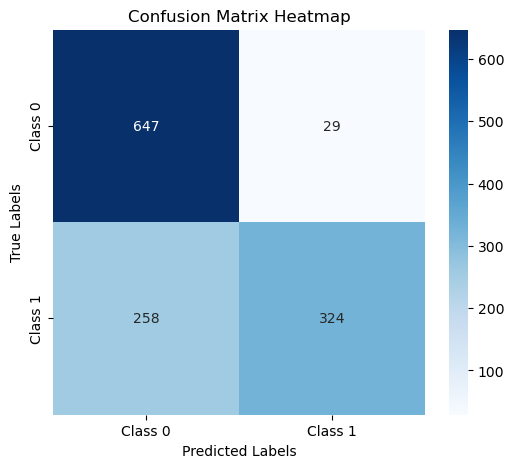

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 클래스 이름 정의
class_names = ['Class 0', 'Class 1']

# Heatmap 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


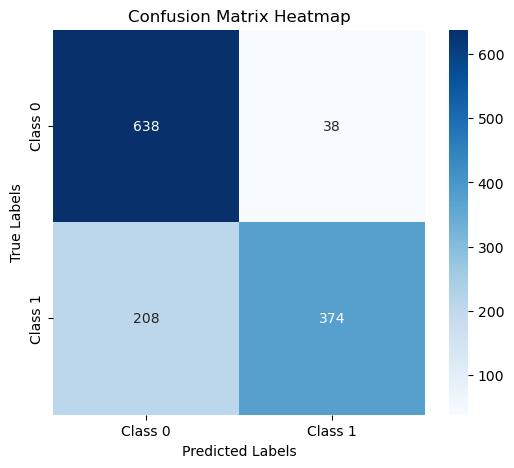

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 클래스 이름 정의
class_names = ['Class 0', 'Class 1']

# Heatmap 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_2nd, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix

cm_valid_2nd = confusion_matrix(y_true, y_pred_valid_2nd)
print("Confusion Matrix:\n", cm_valid_2nd)


Confusion Matrix:
 [[27 31]
 [24 40]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_valid, digits=3))

              precision    recall  f1-score   support

           0      0.276     0.167     0.208        48
           1      0.770     0.865     0.815       155

    accuracy                          0.700       203
   macro avg      0.523     0.516     0.511       203
weighted avg      0.653     0.700     0.671       203



In [36]:
# 모델 훈련 후
model_2nd.save_checkpoint(model_dir="./Model/CYP1A2_Inhibitor/")  # 원하는 경로 지정

In [21]:
model

In [17]:
print("Train labels shape:", train_dataset.y.shape)
print("Valid labels shape:", valid_dataset.y.shape)


Train labels shape: (1624,)
Valid labels shape: (203,)
